In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from collections import Counter
from wordcloud import WordCloud

plt.rc('font', family='Malgun Gothic')
font_path = r"C:/windows/fonts/malgun.ttf"

In [2]:
# for colab
"""!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!cd Mecab-ko-for-Google-Colab
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh
"""

'!pip install konlpy\n!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git\n!cd Mecab-ko-for-Google-Colab\n!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh\n'

In [3]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [39]:
yymm = "2401"

file_path = '../data/'  # 파일 경로를 지정하세요
fn= f'epic_metadata_{yymm}.xlsx'

df = pd.read_excel(file_path+fn)

In [40]:
df.head()

,Unnamed: 0,자료명,발간일,발간처,요약
0,246696,2024년 2월 물가연동국고채 종목별 연동계수,2024.01.02,기획재정부 국고국 국채과,기획재정부는 1.2.(화) 2024년 2월 물가연동국고채 종목별 연동계수를 발표하였...
1,246697,「2024년부터 이렇게 달라집니다」 책자 발간,2023.12.28,기획재정부 기획조정실 혁신정책담당관,기획재정부는 12.31.(일) 2024년부터 달라지는 제도와 법규사항 등을 알기 쉽...
2,246698,국세물납증권 56개 종목 공개매각 실시,2024.01.02,기획재정부 국고국 출자관리과,정부는 국유재산정책심의위원회에서 의결한 「2023년도 제3차 국세물납증권 매각 예정...
3,246699,"조달청, 1월 대형사업 총 163건, 1조 8,901억 원 상당 입찰 예정",2024.01.02,조달청,"조달청은 1.2.(화) ’24년 1월 한 달 동안 총 163건 1조 8,901억 원..."
4,246700,인구감소지역 『생활인구』 시범산정 결과 공표,2024.01.01,통계청,통계청과 행정안전부은 1.1.(월) 7개의 인구감소지역에 대해 「생활인구」를 시범 ...


In [41]:
df_moef = df[df['발간처'].str.contains("기획재정부")]
df_mafra = df[df['발간처'].str.contains("농림축산식품부")]
df_fsc = df[df['발간처'].str.contains("금융위원회|금융감독원")]
df_msit = df[df['발간처'].str.contains("과학기술정보통신부")]
df_motie = df[df['발간처'].str.contains("산업통상자원부")]

In [42]:
stop_words = "안 간 붙임 참고 참조 첨부 총리 장관 겸 청 실 는 은 가 등 원 조 개 이 저 다만 하지만 그러나 중 억 년 월 화 수 목 금 토 일 것 줄 만 건 또한 아울러 그리고 전년 금년 이번 올해 내년 기획 재정부 첨부 파일 내용 발표 위원회 감독원 부"
stop_words = stop_words.split(" ")

In [43]:
excluson = ["기획재정부","정부",'과학기술정보통신부','과기정통부','농림축산식품부','농식품부','금융위원회','금융위','금융감독원','금감원','산업통상자원부','산업부',
            '환경부','해양수산부','해수부','공정거래위원회','공정위','식약처','식품의약품안전처','고용노동부','고용부','국토교통부','국토부','중소벤처기업부','중기부',
            '통계청','국세청','관세청','조달청','특허청','통일부','보건복지부','복지부','교육부','한국은행',
            '계획임.','예정임.','밝혔다.','발표하였다.']

In [44]:
def df_to_wordcloud(df, name, name_fn, yymm):
    summary_list = df['요약'].tolist()
    
    nouns = []
    for summary in summary_list:
        for ex in excluson:
            summary = summary.replace(ex,'')
        for noun in tagger.nouns(summary):
            if noun not in stop_words:
                nouns.append(noun)
    
    nouns_counter = Counter(nouns)
    top_nouns = dict(nouns_counter.most_common(100))
    
    wc = WordCloud(background_color='white', font_path=font_path)
    wc.generate_from_frequencies(top_nouns)
    
    figure = plt.figure()
    
    ax = figure.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(wc)
    
    plt.title(f"{name} {yymm}")
    plt.axis('off')
    plt.savefig(f"wordcloud_monthly/wordcloud_{name_fn}_{yymm}.png")
    plt.show()

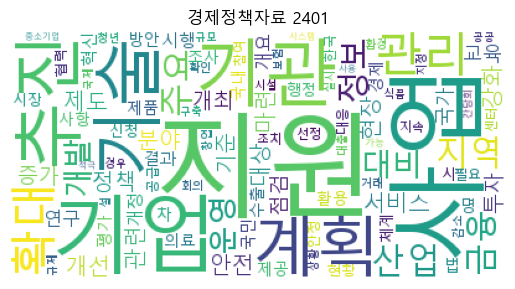

In [45]:
df = df.copy()
name = '경제정책자료'
name_fn = ''

df_to_wordcloud(df, name, name_fn, yymm)